# <font color ='coral'><center>**ON PREDICTING AGE OF ABALONE (HALIOSTIS SP.) USING THE BAGGING REGRETION METHOD**</center></font>
Using python

Data Set link: https://archive.ics.uci.edu/ml/datasets/abalone

Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description

* x1 : Sex / nominal / -- / M, F, and I (infant)
* x2 : Length / continuous / mm / Longest shell measurement
* x3 : Diameter / continuous / mm / perpendicular to length
* x4 : Height / continuous / mm / with meat in shell
* x5 : Whole weight / continuous / grams / whole abalone
* x6 : Shucked weight / continuous / grams / weight of meat
* x7 : Viscera weight / continuous / grams / gut weight (after bleeding)
* x8 : Shell weight / continuous / grams / after being dried
* y : Rings / integer / -- / +1.5 gives the age in years

In [2]:
import pandas as pd
import numpy as np

### <font color='coral'>Load data set</font>

In [4]:
data_set = pd.read_csv('data set/abalone.csv')
data_set.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### <font color='coral'>Chek info data set</font>

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4177 non-null   object 
 1   x2      4177 non-null   float64
 2   x3      4177 non-null   float64
 3   x4      4177 non-null   float64
 4   x5      4177 non-null   float64
 5   x6      4177 non-null   float64
 6   x7      4177 non-null   float64
 7   x8      4177 non-null   float64
 8   y       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<font color='red'>! x1 type objek

In [4]:
data_set.x1.unique()

array(['M', 'F', 'I'], dtype=object)

In [5]:
Sex = []
x1 = 0
x2 = 0
x3 = 0
for i in data_set['x1']:
  if data_set.x1.unique()[0] in i:
    Sex.append(1)
    x1 += 1
  elif data_set.x1.unique()[1] in i:
    Sex.append(2)
    x2 +=1
  else:
    Sex.append(3)
    x3 +=1
data_set['x1_v'] = Sex
data_set.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y,x1_v
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3


In [6]:
print('Number of M:',x1)
print('Number of F:',x2)
print('Number of I:',x3)

Number of M: 1528
Number of F: 1307
Number of I: 1342


In [7]:
data_olah = data_set[['x1_v','x2','x3','x4','x5','x6','x7','x8','y']]
data_olah.columns = [['x1','x2','x3','x4','x5','x6','x7','x8','y']]
data_olah.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data_olah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   (x1,)   4177 non-null   int64  
 1   (x2,)   4177 non-null   float64
 2   (x3,)   4177 non-null   float64
 3   (x4,)   4177 non-null   float64
 4   (x5,)   4177 non-null   float64
 5   (x6,)   4177 non-null   float64
 6   (x7,)   4177 non-null   float64
 7   (x8,)   4177 non-null   float64
 8   (y,)    4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### <font color='coral'>Import library for visualisation data set</font>

In [9]:
import seaborn as sn
import pylab as pl

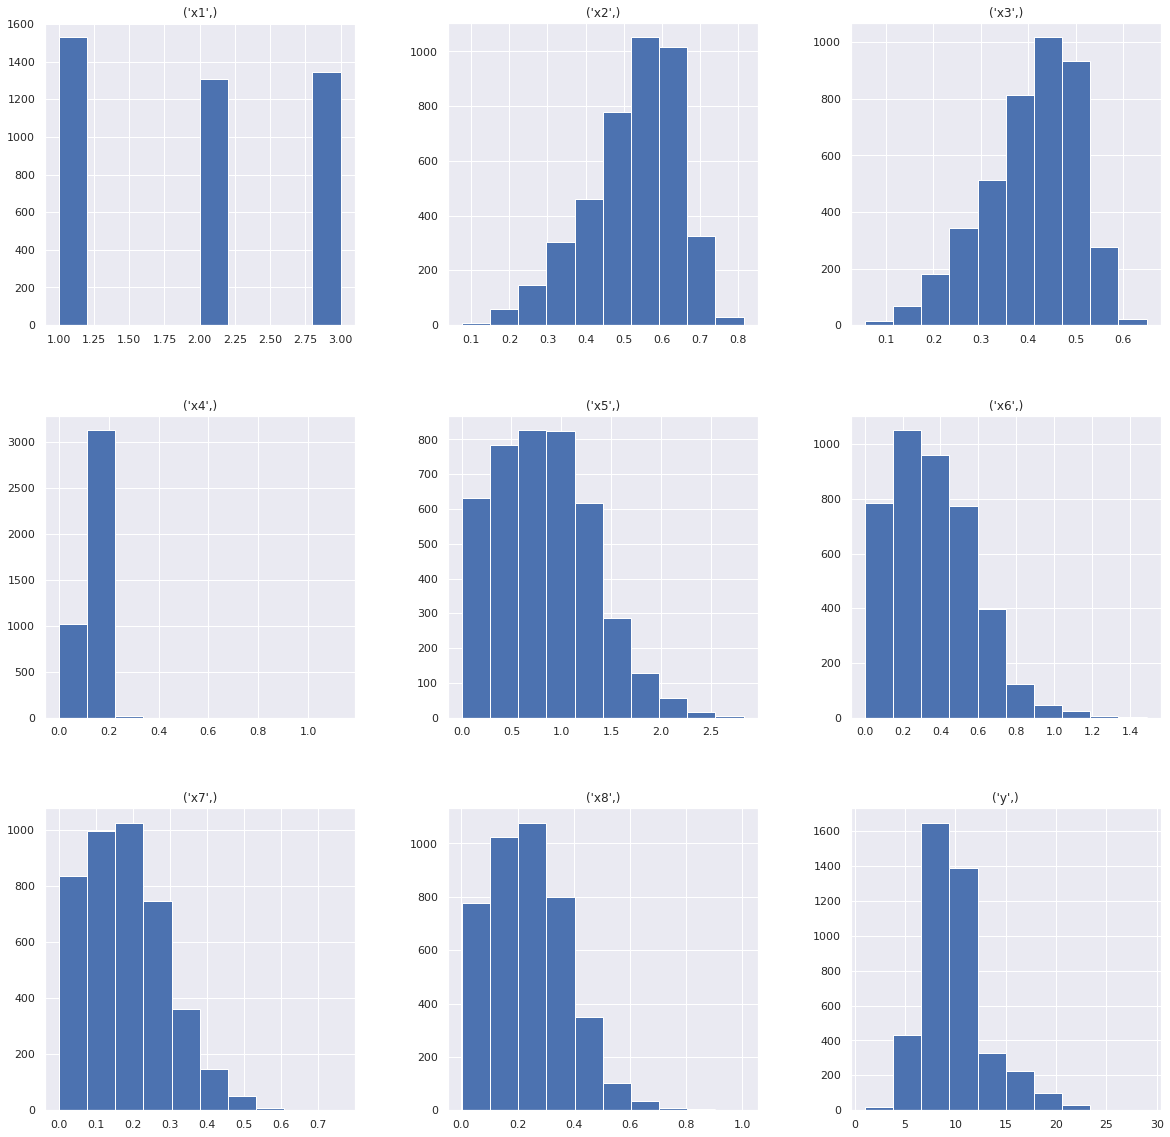

In [10]:
sn.set_theme(style='darkgrid')
data_olah.hist(figsize=(20,20))
pl.show()

### <font color='coral'>Split data set (data training & data testing)</font>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = data_olah.iloc[:,0:-1] # 80%
y = data_olah.iloc[:,-1]   # 20%
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X train:',X_train.shape)
print('X test :',X_test.shape)

X train: (3341, 8)
X test : (836, 8)


### <font color='coral'>Evaluate Bagging Algorithm for Regressor</font>

In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
import numpy as np

In [14]:
model = BaggingRegressor()
model.fit(X_train, y_train)
y_predic = model.predict(X_test)
print('MAE      :',np.mean(abs(y_test-y_predic)))
print('R-Square :',r2_score(y_test,y_predic))

MAE      : 1.5976076555023906
R-Square : 0.5412623599712685


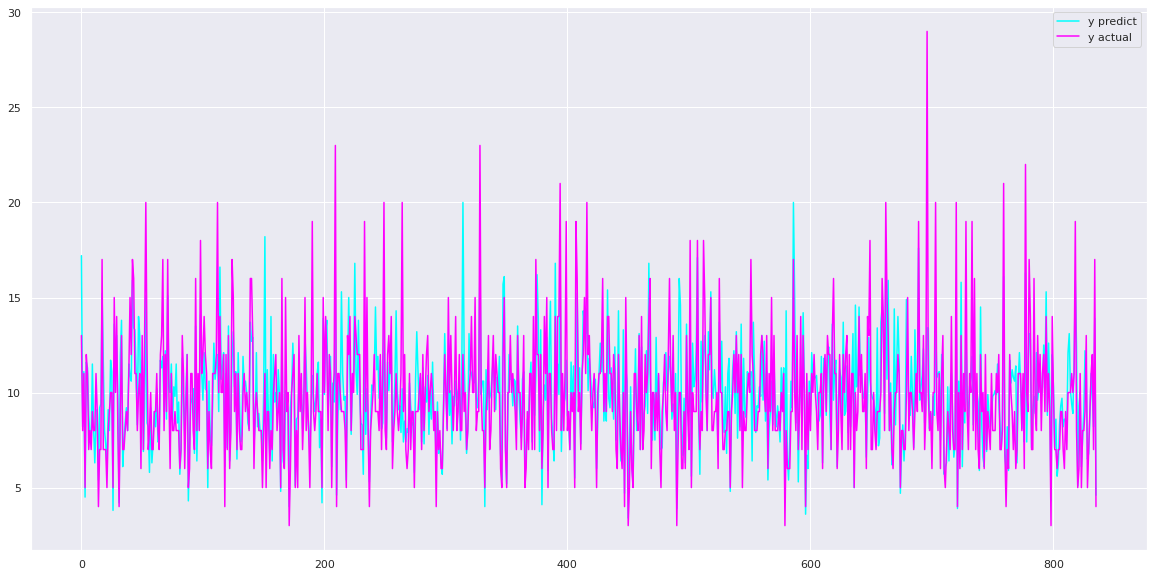

In [15]:
import pylab as pl
import seaborn as sn
sn.set_theme(style='darkgrid')

pl.figure(figsize=(20,10))
se = range(836)
pl.plot(se,y_predic, color = '#00ffff', label='y predict')
pl.plot(se,y_test, color = '#ff00ff', label='y actual')
pl.legend()